In [ ]:
import pandas as pd

# Baca dataset
data = pd.read_csv('C:/Irsyad Fadillah/Semester 4/Data Mining/UAS/realfishdataset.csv')

# Mengubah nilai kategorikal menjadi numerik
data['fish'] = data['fish'].map({'tilapia': 0, 'pangas': 1, 'rui': 2})

# Menyisakan hanya ikan Tilapia, Pangas, dan Rui dalam kolom 'fish'
filtered_data = data[data['fish'].isin([0, 1, 2])]

# Tampilkan hasil
print(filtered_data)


In [12]:
filtered_data.to_csv('C:/Irsyad Fadillah/Semester 4/Data Mining/UAS/filtered_dataset.csv', index=False)

Mean Squared Error (MSE): 0.19947674654194855
Best Parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 1000}


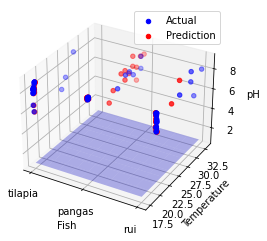

Prediction Results:
    Fish  Actual  Prediction    pH  Temperature
0    2.0     2.0         2.0  6.99        21.06
1    1.0     1.0         1.0  8.66        17.94
2    2.0     2.0         2.0  6.42        20.94
3    0.0     0.0         0.0  8.16        17.75
4    2.0     2.0         1.0  7.80        30.00
..   ...     ...         ...   ...          ...
57   0.0     0.0         0.0  8.79        17.94
58   2.0     2.0         2.0  6.87        21.06
59   0.0     0.0         0.0  8.16        17.62
60   2.0     2.0         2.0  6.93        21.00
61   1.0     1.0         1.0  8.69        17.94

[62 rows x 5 columns]


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Membaca dataset
data = pd.read_csv('C:/Irsyad Fadillah/Semester 4/Data Mining/UAS/filtered_dataset.csv')

# Memisahkan fitur dan target
X = data[['ph', 'temperature']].values
y = data['fish'].values

# Mengubah nilai target menjadi numerik menggunakan LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menginisialisasi model SVR dengan kernel RBF
svr = SVR(kernel='rbf')

# Tuning parameter menggunakan GridSearchCV
param_grid = {'C': [10], 'gamma': [1000], 'epsilon': [0.01]}
grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
svr_best = grid_search.best_estimator_

# Melatih model SVR dengan parameter terbaik
svr_best.fit(X_train, y_train)

# Memprediksi nilai target untuk set pengujian
y_pred = svr_best.predict(X_test)

# Menghitung nilai MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Best Parameters:", grid_search.best_params_)

# Visualisasi 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Menyiapkan data untuk visualisasi
x_actual = y_test
y_actual = X_test[:, 1]
z_actual = X_test[:, 0]

# Mengubah sumbu x menjadi nama ikannya
fish_labels = ['tilapia', 'pangas', 'rui']
ax.set_xticks([0, 1, 2])  # Mengatur posisi tick pada sumbu x
ax.set_xticklabels(fish_labels)  # Mengatur label pada sumbu x

# Membuat scatter plot untuk data aktual
ax.scatter(x_actual, y_actual, z_actual, c='b', marker='o', label='Actual')

# Membuat scatter plot untuk hasil prediksi
ax.scatter(y_pred, y_actual, z_actual, c='r', marker='o', label='Prediction')

# Membuat surface plot untuk hasil prediksi
x_surf = np.linspace(min(x_actual), max(x_actual), 10)
y_surf = np.linspace(min(y_actual), max(y_actual), 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = svr_best.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='b', alpha=0.3)

# Memberi label pada sumbu-sumbu
ax.set_xlabel('Fish')
ax.set_ylabel('Temperature')
ax.set_zlabel('pH')

# Menampilkan legenda
ax.legend()

# Menampilkan plot
plt.show()

# Membuat DataFrame untuk hasil prediksi
results = pd.DataFrame({"Fish": label_encoder.inverse_transform(y_test),
                        "Actual": label_encoder.inverse_transform(y_test),
                        "Prediction": label_encoder.inverse_transform(np.round(y_pred).astype(int)),
                        "pH": X_test[:, 0],
                        "Temperature": X_test[:, 1]})

# Menampilkan tabel hasil prediksi
print("Prediction Results:")
print(results)


In [21]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder

# Membaca dataset
data = pd.read_csv('C:/Irsyad Fadillah/Semester 4/Data Mining/UAS/filtered_dataset.csv')

# Memisahkan fitur dan target
X = data[['ph', 'temperature']].values
y = data[['fish']].values

# Mengubah nilai target menjadi numerik menggunakan LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.ravel())

# Menginisialisasi model SVR
base_model = SVR(kernel='rbf')

# Menginisialisasi model MultiOutputRegressor dengan model basis SVR
model = MultiOutputRegressor(base_model)

# Melatih model dengan data pelatihan
model.fit(X, y_encoded.reshape(-1, 1))

# Memasukkan nilai pH dan suhu yang ingin diprediksi
ph = 6.99
temperature = 28.94
new_data = np.array([[ph, temperature]])

# Melakukan prediksi
predicted_fish_encoded = model.predict(new_data)

# Mengembalikan nilai prediksi ke label asli
predicted_fish = label_encoder.inverse_transform(predicted_fish_encoded.astype(int))

# Menampilkan hasil prediksi
print("Predicted Fish:", predicted_fish[0])


Predicted Fish: 0.0


C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder

# Membaca dataset
data = pd.read_csv('C:/Irsyad Fadillah/Semester 4/Data Mining/UAS/filtered_dataset.csv')

# Memisahkan fitur dan target
X = data[['ph', 'temperature']].values
y = data[['fish']].values

# Mengubah nilai target menjadi numerik menggunakan LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.ravel())

# Menginisialisasi model SVR
base_model = SVR(kernel='rbf')

# Menginisialisasi model MultiOutputRegressor dengan model basis SVR
model = MultiOutputRegressor(base_model)

# Melatih model dengan data pelatihan
model.fit(X, np.tile(y_encoded, (X.shape[0], 1)))

# Mengambil input nilai pH dan suhu dari pengguna
ph = float(input("Masukkan nilai pH: "))
temperature = float(input("Masukkan nilai suhu: "))
new_data = np.array([[ph, temperature]])

# Melakukan prediksi
predicted_fish_encoded = model.predict(new_data)

# Mengembalikan nilai prediksi ke label asli
predicted_fish = label_encoder.inverse_transform(predicted_fish_encoded.flatten().astype(int))

# Menampilkan hasil prediksi
print("Predicted Fish:", predicted_fish[0])


Masukkan nilai pH: 8.16
Masukkan nilai suhu: 17.62
Predicted Fish: 2.0
